# Prediction of Singapore HDB Resale Price based on Governmental Data
<hr>
Thomas ten Hacken, Maxime Kayser and Mei-Jun Yeh <br>
CE9010 Introduction to Data Science <br>
Singapore, April 2018
<hr>
## Introduction

Predicting housing prices is an extensive researched topic in economics and data science. Previously conducted studies by [4,5,6,8] showed that a neural network is better performing to predict future value than a multiple regression model. This is especially the case for a "true" open market [4]. This is contradicted by [7], who argue that results from neural networks vary widely, while traditional regression models are more consistent. Besides predicting prices based on features, novel prediction models have been developed. For example, a price prediction model that looks at the $#$ of searches on Google [9]. Although the researchers found that searches and housing prices are correlated, it is difficult to predict the housing price of a specific building and its characteristics.

Studies conducted often work with an extensive list of variables, including features of the house, but also from the environment and the amenities. For example, [10] use variables such as size (in square meters) and age, but also the presence of a garage or swimming pool. 

### Characteristics of the HDB Property Market
In Singapore, a distinction can be made between two types of properties: a private residential market and a market that is managed by the Housing and Development Board (HDB), which is part of the Ministry of National Development [2]. The flats developed in the HDB market are heavily subsidized by the Singaporean government, and are affordable alternatives for Singaporean residents.

The market for HDB properties differs from the private residential market in several ways. Firstly, the properties are leased to the residents. This lease period is typically 99 years. After the period, the property ownership rights are again in the hands of HDB. Thus, the owner of an HDB apartment is simply leasing it for an extensive amount of time. This differs from renting, since in that case the tenant needs to pay monthly based on actual market conditions [3]. Besides the lease, the owner can be eligible to rent out or sell the flat during the lease period. This created a new market, bla bla...

A previous study conducted in the private residential market [11] shows variables being used in their predictive model. This includes dummy variables for a total of 15 facilities, ranging from swimming pool to security and gyms. The study also took into account unit characteristics, such as size, age and floor level. HDB flats do not have additional facilities, but have similar unit characteristics. The model also takes into account the distance to strategic positions, such as MRT stations and schools.


### Research Objective

Since the market is monitored by the Singaporean government, it can be considered as not truly open. Therefore, based on previous research, a regression model might be sufficient. This research aims to validate if a regression model is sufficient for predicting housing prices in the HDB resale market. The HDB resale data from the Singaporean government, spanning from 1990 until January 2018, is used to develop the model.

After merging the data, we explore the data, then clean and preprocess the data and finally train the data to predict the test data. 

## Libraries
<hr>
The libraries used are pandas, numpy, seaborn, Counter, matplotlib, axes3d, linearregression.

In [159]:
#data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn
from collections import Counter

#visualization
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from IPython.display import IFrame

# machine learning library
from sklearn import datasets, linear_model, cross_validation
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

# other
import time


## 1 Data Acquisition
<hr>
The data for this report is acquired from the Singapore government website [1]. Data are collected from the period 1990 until January 2018. The data is provided in four seperate files, which will be merged into Python. The third file (> 20 MB) was seperated into periods of 2006-2012 and 2012-2014. This was necessary to make use of the Github repository.

In [82]:
#load dataset
data1 = pd.read_csv('sg-resale-flat-prices-1990-1999.csv', sep =',')
print('Number of training data =', data1.shape)

data2 = pd.read_csv('sg-resale-flat-prices-2000-2005.csv', sep =',')
print('Number of training data =', data2.shape)

data3 = pd.read_csv('sg-resale-flat-prices-2006-2012.csv', sep =',')
print('Number of training data =', data3.shape)

data4 = pd.read_csv('sg-resale-flat-prices-2012-2014.csv', sep =',')
print('Number of training data =', data4.shape)

data5 = pd.read_csv('sg-resale-flat-prices-2014-2018.csv', sep =',')
print('Number of training data =', data5.shape)

Number of training data = (288144, 10)
Number of training data = (197175, 10)
Number of training data = (172476, 10)
Number of training data = (52203, 10)
Number of training data = (58631, 11)


Following the shape of the data, there is a noticable difference from the last dataset. To discover which variable has been added to the dataset, we recall the first two features from both the first and the last dataset. 

In [83]:
#show features of data set 1
data1.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [84]:
#show features of data set 5
data5.tail(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
58626,2018-01,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,68,490000.0
58627,2018-01,YISHUN,5 ROOM,876,YISHUN ST 81,04 TO 06,121.0,Improved,1987,69,468000.0
58628,2018-01,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,146.0,Maisonette,1987,68,555000.0
58629,2018-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,69,550000.0
58630,2018-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,146.0,Maisonette,1985,66,545000.0


By comparing the two data sets, we can see that the extra feature is the remaining lease year of the HBD housing. In Singapore, the lease of the HBD housing starts with 99 years. In the 99 years, the appartment can be resold to someone else, but this does not mean that 99 years will be refreshed. The number of years the previous owner has lived in the appartment will be substracted instead. After the remaining lease year, the current owner will have to move [source]. We believe this is an important feature to consider in the predictive model. Therefore, we will recalculate the row for the other data sets as well during the preprocessing stage. <br>

However, before the preprocessing stage, exploration will be done to figure out other possible changes. To continue with the exploration, the data should be merged. To merge the data, the datasets should consist of the same number of features. Therefore, the remaining lease variable will be removed first.

In [85]:
data5 = data5.drop('remaining_lease',1)
print('Number of training data =', data5.shape)

Number of training data = (58631, 10)


In [86]:
data5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0


(Exploration - Check Storey Range) Since the storey range is ranging differently at a certain point. We are checking in which dataset(s) this is happening.

In [87]:
print(np.unique(data1['storey_range']))
print(np.unique(data2['storey_range']))
print(np.unique(data3['storey_range']))
print(np.unique(data4['storey_range']))
print(np.unique(data5['storey_range']))

['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27']
['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30']
['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30' '31 TO 33' '34 TO 36'
 '37 TO 39' '40 TO 42']
['01 TO 03' '01 TO 05' '04 TO 06' '06 TO 10' '07 TO 09' '10 TO 12'
 '11 TO 15' '13 TO 15' '16 TO 18' '16 TO 20' '19 TO 21' '21 TO 25'
 '22 TO 24' '25 TO 27' '26 TO 30' '28 TO 30' '31 TO 33' '31 TO 35'
 '34 TO 36' '36 TO 40' '37 TO 39' '40 TO 42']
['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30' '31 TO 33' '34 TO 36'
 '37 TO 39' '40 TO 42' '43 TO 45' '46 TO 48' '49 TO 51']


### 1.1 Merge Datasets
Since the data are divided into five datasets, we want to merge the data for further exploration. To do this, the concatenation is used from pandas.

In [88]:
#concatenate dataset
sets = [data1, data2, data3, data4, data5]
data = pd.concat(sets)
print('Number of training data =', data.shape)


Number of training data = (768629, 10)


## 3 Cleaning and Preprocessing the Dataset
<hr>
After exploring the dataset, we came across the following points for preprocessing the data: 
- The feature month consists of sales year and month, e.g. 1990-01. To include the variable in the model, this variable will be seperated to a variable called sales year and a variable called month. 
- However, a linear regression will not be able to read the years, since it can see it as another numerical value. Therefore, the remaining lease year is calculated. Once the sales year variable is created, the remaining lease year can be computed by using the following formula: $remaining lease year = 99 - (sales year - lease commence date)$.
- Furthermore, there are rows containing characters. These rows (town, flat type, flat model and storey range) are transformed into dummy variables to clarify their levels, with other words, to quantify the qualitative data. <br>

### 3.1 Data Cleaning
During the exploration, there are some cleaning that should be performed. First, the flat types consist of eight types, which should be seven types instead. The flat type "Multi Generation" has a unique value with a space in between and one with a hyphen. Second, the flat models consist of 32 models, which should be 21 instead. This is also because of the capital usage. These doubles are removed by cleaning the data.


In [96]:
pd.options.mode.chained_assignment = None #SettingWithCopyWarning for confusing chained assignment disabled

#remove doubles
data['flat_type'][data['flat_type'] == 'MULTI-GENERATION'] = 'MULTI GENERATION'

#flat_type count
count_flat_type = data['flat_type'].nunique()
print("Total Flat Type Count:", count_flat_type)
flat_type_count = data['flat_type'].value_counts()
print("Flat Type \n" +str(flat_type_count))

Total Flat Type Count: 7
Flat Type 
4 ROOM              285136
3 ROOM              258482
5 ROOM              156260
EXECUTIVE            58177
2 ROOM                8859
1 ROOM                1246
MULTI GENERATION       469
Name: flat_type, dtype: int64


In [97]:
#remove doubles
data['flat_model'][data['flat_model'] == 'MODEL A'] = 'Model A'
data['flat_model'][data['flat_model'] == 'IMPROVED'] = 'Improved'
data['flat_model'][data['flat_model'] == 'NEW GENERATION'] = 'New Generation'
data['flat_model'][data['flat_model'] == 'PREMIUM APARTMENT'] = 'Premium Apartment'
data['flat_model'][data['flat_model'] == 'SIMPLIFIED'] = 'Simplified'
data['flat_model'][data['flat_model'] == 'STANDARD'] = 'Standard'
data['flat_model'][data['flat_model'] == 'APARTMENT'] = 'Apertment'
data['flat_model'][data['flat_model'] == 'MAISONETTE'] = 'Maisonette'
data['flat_model'][data['flat_model'] == 'ADJOINED FLAT'] = 'Adjoined flat'
data['flat_model'][data['flat_model'] == 'MODEL A-MAISONETTE'] = 'Model A-Maisonette'
data['flat_model'][data['flat_model'] == 'TERRACE'] = 'Terrace'
data['flat_model'][data['flat_model'] == 'MULTI GENERATION'] = 'Multi Generation'
data['flat_model'][data['flat_model'] == 'IMPROVED-MAISONETTE'] = 'Improved-Maisonette'
data['flat_model'][data['flat_model'] == '2-ROOM'] = '2-room'

#flat_model count
count_flat_model = data['flat_model'].nunique()
print("Total Flat Model Count:", count_flat_model)
flat_model_count = data['flat_model'].value_counts()
print("Flat Model Count \n" +str(flat_model_count))

Total Flat Model Count: 21
Flat Model Count 
Model A                   208633
Improved                  202602
New Generation            169643
Simplified                 51604
Standard                   38234
Premium Apartment          28886
Maisonette                 25136
Apartment                  19745
Apertment                   9901
Model A2                    8382
Adjoined flat               1913
Model A-Maisonette          1784
Terrace                      609
DBSS                         601
Multi Generation             469
Type S1                      183
Improved-Maisonette          105
Type S2                       80
Premium Maisonette            75
2-room                        38
Premium Apartment Loft         6
Name: flat_model, dtype: int64


### 3.2 Feature Engineering
In this part, we will explore new features that we can add to make our data more valuable. Since the data consists of seven objects, two floats and one integer, the seven objects will be researched and to see which can and will be changed. (Note that adding and dropping variables have been changed to comments, because an error would pop up otherwise. This is because the variable is already added or dropped, thus it cannot be performed again.)

In [101]:
#add sales year variable
if ('sales_year' not in data.columns):
    data.insert(1,'sales_year',(pd.DatetimeIndex(data['month']).year))

#add sales year variable
if ('sales_month' not in data.columns):
    data.insert(1,'sales_month',(pd.DatetimeIndex(data['month']).month))
    
#add sales year variable
if ('month' in data.columns):
    del data['month']

#compute remaining lease variable
if ('remaining_lease' not in data.columns):
    data['remaining_lease'] = 99 - (data.sales_year - data.lease_commence_date)
    
data.describe()

,sales_month,sales_year,floor_area_sqm,lease_commence_date,resale_price,remaining_lease
count,768629.000000,768629.000000,768629.000000,768629.000000,7.686290e+05,768629.000000
mean,6.567902,2003.097582,95.455564,1986.563476,2.823196e+05,82.465894
std,3.411458,7.058447,26.210450,8.851260,1.424499e+05,9.277292
min,1.000000,1990.000000,28.000000,1966.000000,5.000000e+03,47.000000
25%,4.000000,1998.000000,72.000000,1980.000000,1.750000e+05,76.000000
50%,7.000000,2002.000000,93.000000,1985.000000,2.650000e+05,84.000000
75%,10.000000,2009.000000,114.000000,1993.000000,3.700000e+05,90.000000
max,12.000000,2018.000000,307.000000,2015.000000,1.180000e+06,101.000000


In [99]:
data.tail(5)

,month,sales_month,sales_year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
58626,2018-01,1,2018,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,490000.0,68
58627,2018-01,1,2018,YISHUN,5 ROOM,876,YISHUN ST 81,04 TO 06,121.0,Improved,1987,468000.0,68
58628,2018-01,1,2018,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,146.0,Maisonette,1987,555000.0,68
58629,2018-01,1,2018,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,550000.0,69
58630,2018-01,1,2018,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,146.0,Maisonette,1985,545000.0,66


In [105]:
data.describe()

,sales_month,sales_year,floor_area_sqm,lease_commence_date,resale_price,remaining_lease
count,768629.000000,768629.000000,768629.000000,768629.000000,7.686290e+05,768629.000000
mean,6.567902,2003.097582,95.455564,1986.563476,2.823196e+05,82.465894
std,3.411458,7.058447,26.210450,8.851260,1.424499e+05,9.277292
min,1.000000,1990.000000,28.000000,1966.000000,5.000000e+03,47.000000
25%,4.000000,1998.000000,72.000000,1980.000000,1.750000e+05,76.000000
50%,7.000000,2002.000000,93.000000,1985.000000,2.650000e+05,84.000000
75%,10.000000,2009.000000,114.000000,1993.000000,3.700000e+05,90.000000
max,12.000000,2018.000000,307.000000,2015.000000,1.180000e+06,101.000000


### 3.3 Create dummy variables
To use the string variables in the linear regression, dummies are made for the following features: town/area, flat type, flat model and storey range.

In [106]:
#add area variable
data.insert(1,'area',(data['town']))

In [107]:
#dummies for areas
data['area'][data.area == 'BUKIT MERAH'] = 1
data['area'][data.area == 'TOA PAYOH'] = 1
data['area'][data.area == 'QUEENSTOWN'] = 1
data['area'][data.area == 'GEYLANG'] = 1
data['area'][data.area == 'KALLANG/WHAMPOA'] = 1
data['area'][data.area == 'BISHAN'] = 1
data['area'][data.area == 'MARINE PARADE'] = 1
data['area'][data.area == 'CENTRAL AREA'] = 1
data['area'][data.area == 'BUKIT TIMAH'] = 1
data['area'][data.area == 'TAMPINES'] = 2
data['area'][data.area == 'YISHUN'] = 2
data['area'][data.area == 'BEDOK'] = 2
data['area'][data.area == 'PASIR RIS'] = 2
data['area'][data.area == 'JURONG WEST'] = 3
data['area'][data.area == 'BUKIT BATOK'] = 3
data['area'][data.area == 'CHOA CHU KANG'] = 3
data['area'][data.area == 'CLEMENTI'] = 3
data['area'][data.area == 'JURONG EAST'] = 3
data['area'][data.area == 'BUKIT PANJANG'] = 3
data['area'][data.area == 'WOODLANDS'] = 4
data['area'][data.area == 'SEMBAWANG'] = 4
data['area'][data.area == 'LIM CHU KANG'] = 4
data['area'][data.area == 'ANG MO KIO'] = 5
data['area'][data.area == 'HOUGANG'] = 5
data['area'][data.area == 'SERANGOON'] = 5
data['area'][data.area == 'SENGKANG'] = 5
data['area'][data.area == 'PUNGGOL'] = 5

area_count = data['area'].value_counts()
print("Area \n" +str(area_count))

#source: http://www.hdb.gov.sg/cs/infoweb/about-us/history/hdb-towns-your-home

Area 
2    215084
3    193490
1    160121
5    136074
4     63860
Name: area, dtype: int64


In [108]:
#dummies for flat types
data['flat_type'][data.flat_type == '1 ROOM'] = 1
data['flat_type'][data.flat_type == '2 ROOM'] = 2
data['flat_type'][data.flat_type == '3 ROOM'] = 3
data['flat_type'][data.flat_type == '4 ROOM'] = 4
data['flat_type'][data.flat_type == '5 ROOM'] = 5
data['flat_type'][data.flat_type == 'MULTI GENERATION'] = 6
data['flat_type'][data.flat_type == 'EXECUTIVE'] = 7

flat_type_count = data['flat_type'].value_counts()
print("Flat Type \n" +str(flat_type_count))

#source: http://www.hdb.gov.sg/cs/infoweb/residential/buying-a-flat/new/types-of-flats&rendermode=preview

Flat Type 
4    285136
3    258482
5    156260
7     58177
2      8859
1      1246
6       469
Name: flat_type, dtype: int64


In [109]:
#dummies for flat models
flat_model_array = np.unique(data['flat_model'])
n = len(flat_model_array)

for i in range(0,n):
    data['flat_model'][data['flat_model'] == flat_model_array[i]] = i

count_flat_model = data['flat_model'].nunique()
print("Total Flat Model Count:", count_flat_model)
flat_model_count = data['flat_model'].value_counts()
print("Flat Model Count \n" +str(flat_model_count))

Total Flat Model Count: 21
Flat Model Count 
8     208633
5     202602
12    169643
16     51604
17     38234
13     28886
7      25136
2      19745
3       9901
10      8382
1       1913
9       1784
18       609
4        601
11       469
19       183
6        105
20        80
15        75
0         38
14         6
Name: flat_model, dtype: int64


In [110]:
#dummies for storey ranges
storey_range_array = np.unique(data['storey_range'])
n = len(storey_range_array)

for i in range(0,n):
    data['storey_range'][data['storey_range'] == storey_range_array[i]] = i

#data['storey_range'][data.flat_type == '01 TO 03'] = 1
#data['storey_range'][data.flat_type == '01 TO 03'] = 2
#data['storey_range'][data.flat_type == '01 TO 03'] = 3

count_storey_range = data['storey_range'].nunique()
print("Total Storey Range Count:", count_storey_range)
storey_range_count = data['storey_range'].value_counts()
print("Storey Range Count \n" +str(storey_range_count))

Total Storey Range Count: 25
Storey Range Count 
2     196169
4     177012
0     158446
5     149470
7      46780
8      16906
10      8337
12      5233
1       2700
3       2474
13      2100
6       1259
15       788
9        265
16       151
18       151
20       148
11        92
21        73
14        39
23        11
22        11
19         7
24         5
17         2
Name: storey_range, dtype: int64


In [111]:
data.tail(10)

,sales_month,area,sales_year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
58621,1,2,2018,YISHUN,5,159,YISHUN ST 11,5,126.0,5,1985,477000.0,66
58622,1,2,2018,YISHUN,5,298,YISHUN ST 20,7,111.0,5,2000,487000.0,81
58623,1,2,2018,YISHUN,5,229,YISHUN ST 21,2,121.0,5,1985,410000.0,66
58624,1,2,2018,YISHUN,5,212,YISHUN ST 21,0,121.0,5,1985,440000.0,66
58625,1,2,2018,YISHUN,5,607,YISHUN ST 61,4,121.0,5,1987,473800.0,68
58626,1,2,2018,YISHUN,5,760,YISHUN ST 72,4,122.0,5,1987,490000.0,68
58627,1,2,2018,YISHUN,5,876,YISHUN ST 81,2,121.0,5,1987,468000.0,68
58628,1,2,2018,YISHUN,7,792,YISHUN RING RD,4,146.0,7,1987,555000.0,68
58629,1,2,2018,YISHUN,7,387,YISHUN RING RD,2,146.0,7,1988,550000.0,69
58630,1,2,2018,YISHUN,7,277,YISHUN ST 22,4,146.0,7,1985,545000.0,66


To check whether the remaining lease variable is correct, the data tail from dataset 5 in the data acquisition is used to compare with the new data. Since only the fifth data set consists of this data, we could use the column for validation. 

### 3.4 Variables

The variables considered in the research will be: <br>
$x_1$ Remaining lease year <br>
$x_2$ Floor area squared meters <br>
$D_3$ Town and/or Area <br>
$D_4$ Flat type <br>
$D_5$ Flat model <br>
$D_6$ Storey range <br>
$x_7$ Month <br>
$Y$ Resale price <br>

In [112]:
#remove unnecessary variables
#data = data.drop('town',1)
#data = data.drop('block',1)
#data = data.drop('street_name',1)

## 4 Data Analysis
<hr>
This part of the report will show algorithms that have been applied to predict the housing prices. We have focused on regressions with different features. 

Some columns are still of 'object' type and need to be changed to int or float in order to run XGBoost.

In [125]:
print(data.dtypes)
data_int = data.copy()
data_int['flat_type'] = pd.to_numeric(data_int['flat_type'])
data_int['storey_range'] = pd.to_numeric(data_int['storey_range'])
data_int['flat_model'] = pd.to_numeric(data_int['flat_model'])
data_int['area'] = pd.to_numeric(data_int['area'])
print(data_int.dtypes)

sales_month              int64
area                    object
sales_year               int64
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease          int64
dtype: object
sales_month              int64
area                     int64
sales_year               int64
town                    object
flat_type                int64
block                   object
street_name             object
storey_range             int64
floor_area_sqm         float64
flat_model               int64
lease_commence_date      int64
resale_price           float64
remaining_lease          int64
dtype: object


To quickly different algorithms and features, we use a sample size of the full train data.<br>

In [136]:
data_sample = data_int.sample(frac=0.1)

### 4.1 All Features

In [137]:
data.describe()

,sales_month,sales_year,floor_area_sqm,lease_commence_date,resale_price,remaining_lease
count,768629.000000,768629.000000,768629.000000,768629.000000,7.686290e+05,768629.000000
mean,6.567902,2003.097582,95.455564,1986.563476,2.823196e+05,82.465894
std,3.411458,7.058447,26.210450,8.851260,1.424499e+05,9.277292
min,1.000000,1990.000000,28.000000,1966.000000,5.000000e+03,47.000000
25%,4.000000,1998.000000,72.000000,1980.000000,1.750000e+05,76.000000
50%,7.000000,2002.000000,93.000000,1985.000000,2.650000e+05,84.000000
75%,10.000000,2009.000000,114.000000,1993.000000,3.700000e+05,90.000000
max,12.000000,2018.000000,307.000000,2015.000000,1.180000e+06,101.000000


In [150]:
# Run Forest Run
def random_f(data):
    start = time.time()
    
    if ('town' in data.columns):
        data_input = data.drop(columns=['resale_price','town','street_name','block'],axis=1)
    else:
        data_input = data.drop('resale_price' ,axis=1)
    data_output = data['resale_price']
    x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)

    model_Forest = RandomForestRegressor()
    model_Forest.fit(x_train, y_train)
    y_pred_f = model_Forest.predict(x_test)
    #y_pred_f_train = model_Forest.predict(x_train)
    
    mae_f = mean_absolute_error(y_test, y_pred_f)
    #mae_f_train = mean_absolute_error(y_train, y_pred_f_train)

    print("MAE for Random Forrest is: %.0f"%mae_f)
    #print("For the train set: %.0f" %mae_f_train)
    
    print('RF Time = %.0f'%(time.time() - start))

random_f(data_sample)


MAE for Random Forrest is: 22963
RF Time = 2


In [151]:
# Linear Regression
def lin_reg(data):
    start = time.time()
    
    if ('town' in data.columns):
        data_input = data.drop(columns=['resale_price','town','street_name','block'],axis=1)
    else:
        data_input = data.drop('resale_price' ,axis=1)
    data_output = data['resale_price']
    x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)

    model_lin_reg = LinearRegression()
    model_lin_reg.fit(x_train, y_train)
    y_pred_l = model_lin_reg.predict(x_test)
    #y_pred_l_train = model_Forest.predict(x_train)
    
    mae_l = mean_absolute_error(y_test, y_pred_l)
    #mae_l_train = mean_absolute_error(y_train, y_pred_l_train)

    print("MAE for Linear Regression is: %.0f"%mae_l)
    #print("For the train set: %.0f" %mae_l_train)
    
    print('LR Time = %.0f'%(time.time() - start))

lin_reg(data_sample)


MAE for Linear Regression is: 54712
LR Time = 0


In [152]:
# Run AdaBoost
def ada(data):
    start = time.time()
    
    if ('town' in data.columns):
        data_input = data.drop(columns=['resale_price','town','street_name','block'],axis=1)
    else:
        data_input = data.drop('resale_price' ,axis=1)
    data_output = data['resale_price']
    x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)

    model_abr = AdaBoostRegressor()
    model_abr.fit(x_train, y_train)
    y_pred_abr = model_abr.predict(x_test)
    
    mae_abr = mean_absolute_error(y_test, y_pred_abr)

    print("\nMean Absolute Error for AdaBoost is: %.0f" %mae_abr)
    
    print('Ada Time = %.0f'%(time.time() - start))

ada(data_sample)



Mean Absolute Error for AdaBoost is: 66635
Ada Time = 3


In [153]:
# Run GradientBoostingRegressor
def gbr(data):
    start = time.time()
    
    if ('town' in data.columns):
        data_input = data.drop(columns=['resale_price','town','street_name','block'],axis=1)
    else:
        data_input = data.drop('resale_price' ,axis=1)
    data_output = data['resale_price']
    x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)

    model_gbr = GradientBoostingRegressor()
    model_gbr.fit(x_train, y_train)
    y_pred_gbr = model_gbr.predict(x_test)
    
    mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

    print("\nMean Absolute Error for GradientBoostingRegressor is: %.0f" %mae_gbr)    
    
    print('GBR Time = %.0f'%(time.time() - start))

gbr(data_sample)



Mean Absolute Error for GradientBoostingRegressor is: 27216
GBR Time = 4



Mean Absolute Error for XGBoost is: 30070


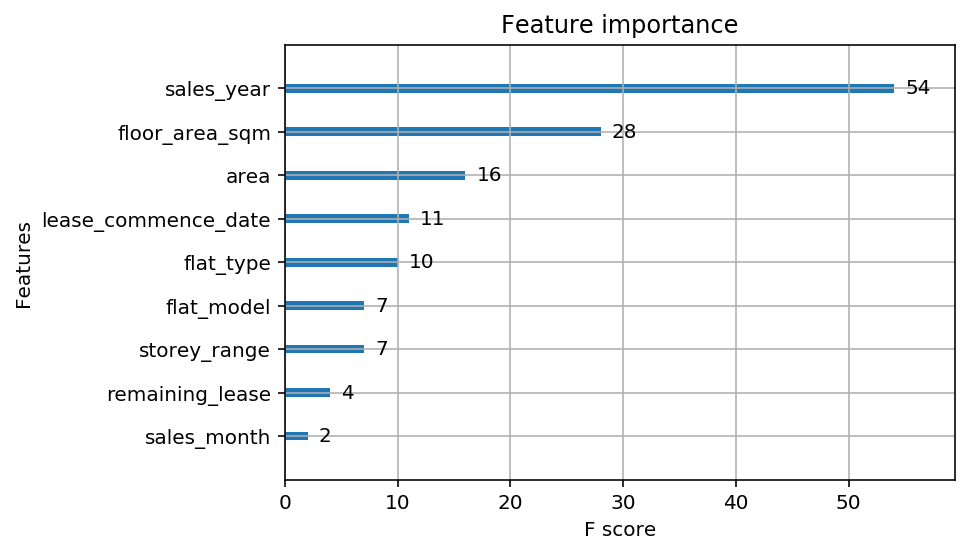

XGB Time = 1


In [154]:
# Run XGD Boost
def xgb_boost(data):
    start = time.time()
    
    if ('town' in data.columns):
        data_input = data.drop(columns=['resale_price','town','street_name','block'],axis=1)
    else:
        data_input = data.drop('resale_price' ,axis=1)
    data_output = data['resale_price']
    x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)
    
    dtrain = xgb.DMatrix(x_train, label = y_train)
    dtest = xgb.DMatrix(x_test, label = y_train)
    param = {
        'max_depth': 3,  # the maximum depth of each tree. Try with max_depth: 2 to 10.
        'eta': 0.3,  # the training step for each iteration. Try with ETA: 0.1, 0.2, 0.3...
        'silent': 1,  # logging mode - quiet
        'objective': 'reg:linear'}  # defines the loss function to be minimized  
    num_round = 20  # the number of training iterations. Try with num_round around few hundred!
    #----------------
    bst = xgb.train(param, dtrain, num_round)
    y_pred_xgb = bst.predict(dtest)
    best_preds = np.asarray([np.argmax(line) for line in y_pred_xgb])

    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

    print("\nMean Absolute Error for XGBoost is: %.0f" %mae_xgb)
    xgb.plot_importance(bst)
    plt.show()
    
    print('XGB Time = %.0f'%(time.time() - start))

xgb_boost(data_sample)


In [161]:
# Neural Network
def neural(data):
    start = time.time()
    
    if ('town' in data.columns):
        data_input = data.drop(columns=['resale_price','town','street_name','block'],axis=1)
    else:
        data_input = data.drop('resale_price' ,axis=1)
    data_output = data['resale_price']
    x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)

    model_n = MLPRegressor()
    model_n.fit(x_train, y_train)
    y_pred_n = model_n.predict(x_test)
    
    mae_n = mean_absolute_error(y_test, y_pred_n)

    print("\nMean Absolute Error for Neural Network is: %.0f" %mae_n)    
    
    print('Neural Time = %.0f'%(time.time() - start))

neural(data_sample)


Mean Absolute Error for Neural Network is: 72932
Neural Time = 56


/Users/maximekayser/miniconda3/envs/kkbox/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Thus, so far, Random Forrest has performed the best.

### 4.2 Trying Normalization Methods
#### 4.2.1 Z-Scoring


### z-scoring ###
MAE for Linear Regression is: 54687
LR Time = 0
MAE for Random Forrest is: 22987
RF Time = 2

Mean Absolute Error for AdaBoost is: 65939
Ada Time = 4

Mean Absolute Error for GradientBoostingRegressor is: 27223
GBR Time = 4

Mean Absolute Error for XGBoost is: 30070


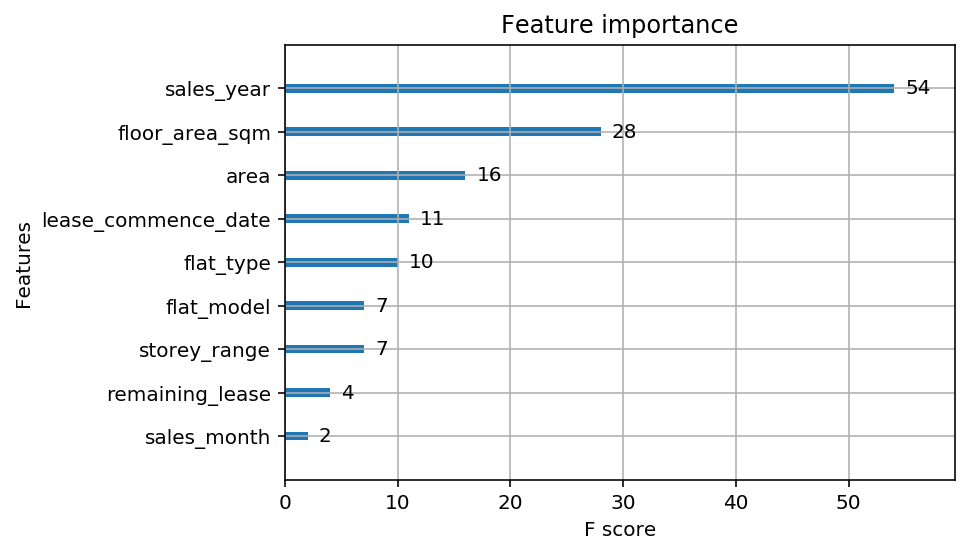

XGB Time = 2


In [143]:
# z-scoring
data_z = data_sample.drop(columns=['resale_price','town','street_name','block'],axis=1)
data_z =(data_z - data_z.mean())/data_z.std()
data_z[['resale_price','town','street_name','block']] = data_sample[['resale_price','town','street_name','block']]

print('\n### z-scoring ###')
lin_reg(data_z)
random_f(data_z)
ada(data_z)
gbr(data_z)
xgb_boost(data_z)

#### 4.2.2 Min/Max - Normalization


### max-normalization ###
MAE for Linear Regression is: 54691
LR Time = 0
MAE for Random Forrest is: 22997
RF Time = 2

Mean Absolute Error for AdaBoost is: 63587
Ada Time = 3

Mean Absolute Error for GradientBoostingRegressor is: 27215
GBR Time = 3

Mean Absolute Error for XGBoost is: 30070


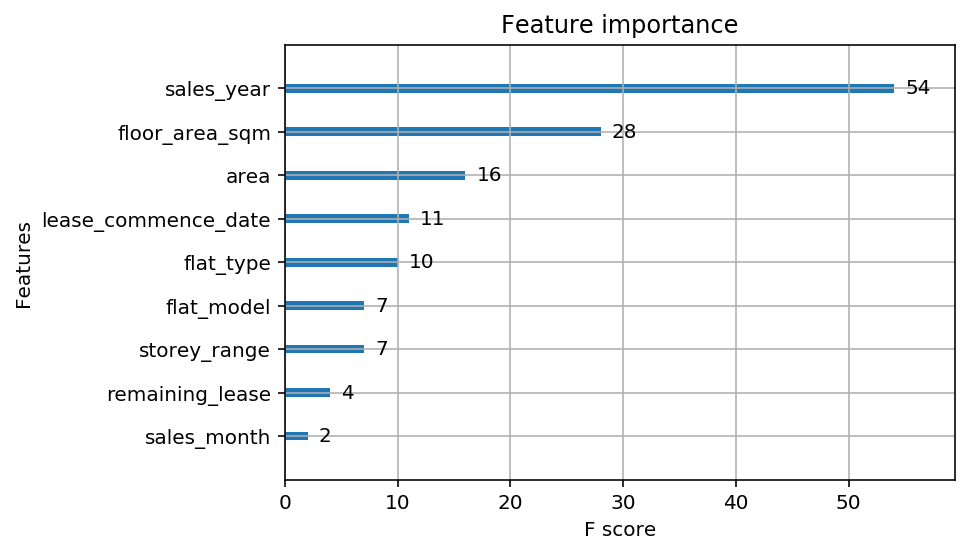

XGB Time = 1


In [144]:
# max normalization
data_norm = data_sample.drop(columns=['resale_price','town','street_name','block'],axis=1)
data_norm = (data_norm - data_norm.min())/(data_norm.max() - data_norm.min())
data_norm[['resale_price','town','street_name','block']] = data_sample[['resale_price','town','street_name','block']]

print('\n### max-normalization ###')
lin_reg(data_norm)
random_f(data_norm)
ada(data_norm)
gbr(data_norm)
xgb_boost(data_norm)


We can see no major differences for max/min normalization or z-scoring and thus don't apply those procedures further on.

### 4.3 Leaving aside one feature at the time


### sales_month removed ###
MAE for Linear Regression is: 54817
LR Time = 0
MAE for Random Forrest is: 24499
RF Time = 2

Mean Absolute Error for AdaBoost is: 62107
Ada Time = 3

Mean Absolute Error for GradientBoostingRegressor is: 27701
GBR Time = 3

Mean Absolute Error for XGBoost is: 30355


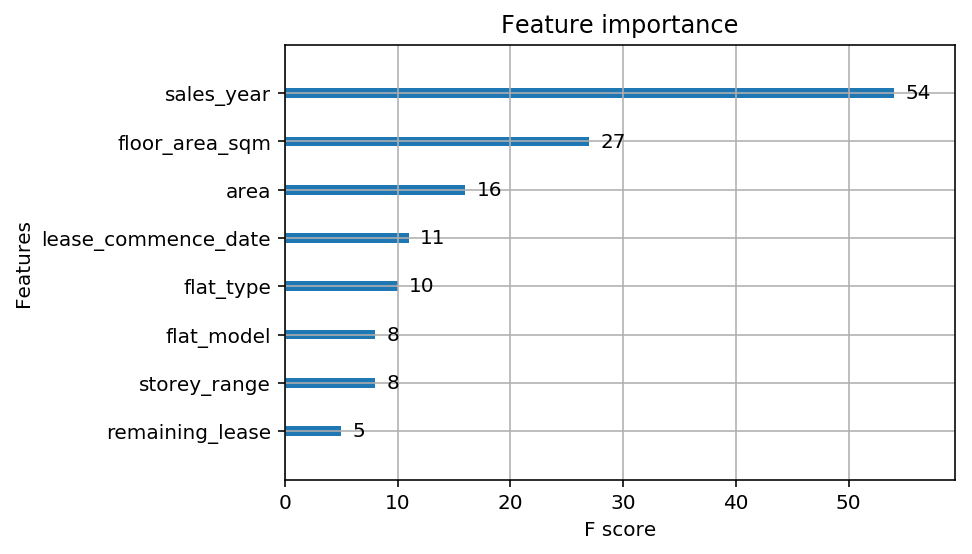

XGB Time = 1

### area removed ###
MAE for Linear Regression is: 55586
LR Time = 0
MAE for Random Forrest is: 31888
RF Time = 2

Mean Absolute Error for AdaBoost is: 69993
Ada Time = 3

Mean Absolute Error for GradientBoostingRegressor is: 33391
GBR Time = 2

Mean Absolute Error for XGBoost is: 35240


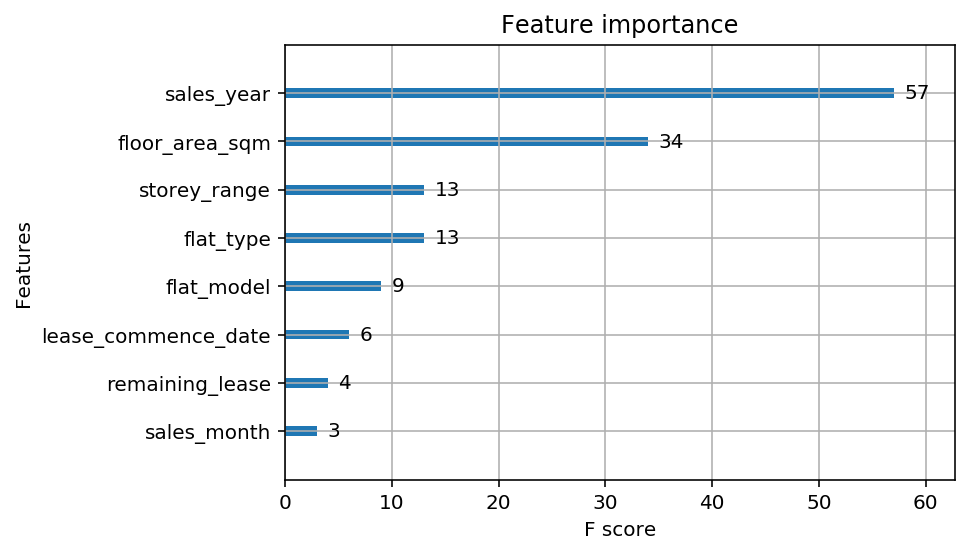

XGB Time = 1

### sales_year removed ###
MAE for Linear Regression is: 54687
LR Time = 0
MAE for Random Forrest is: 24827
RF Time = 2

Mean Absolute Error for AdaBoost is: 75691
Ada Time = 3

Mean Absolute Error for GradientBoostingRegressor is: 41922
GBR Time = 3

Mean Absolute Error for XGBoost is: 45042


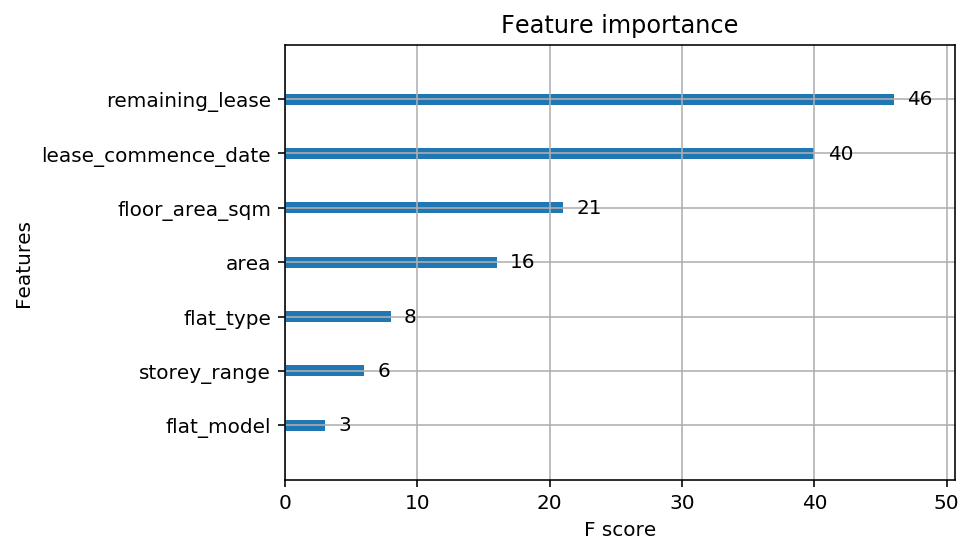

XGB Time = 1

### flat_type removed ###
MAE for Linear Regression is: 55363
LR Time = 0
MAE for Random Forrest is: 23302
RF Time = 2

Mean Absolute Error for AdaBoost is: 63151
Ada Time = 3

Mean Absolute Error for GradientBoostingRegressor is: 28031
GBR Time = 3

Mean Absolute Error for XGBoost is: 30130


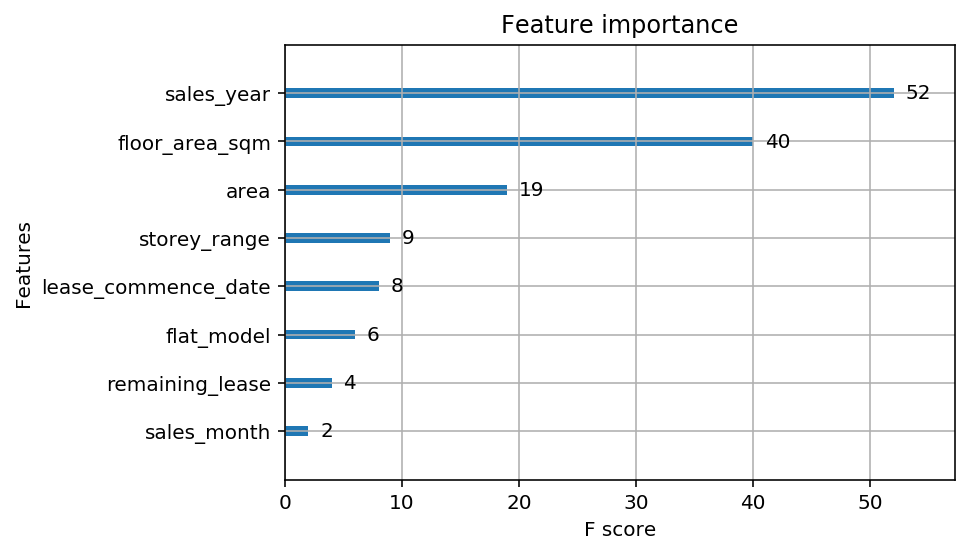

XGB Time = 1

### storey_range removed ###
MAE for Linear Regression is: 55548
LR Time = 0
MAE for Random Forrest is: 23675
RF Time = 2

Mean Absolute Error for AdaBoost is: 66327
Ada Time = 3

Mean Absolute Error for GradientBoostingRegressor is: 28044
GBR Time = 3

Mean Absolute Error for XGBoost is: 30435


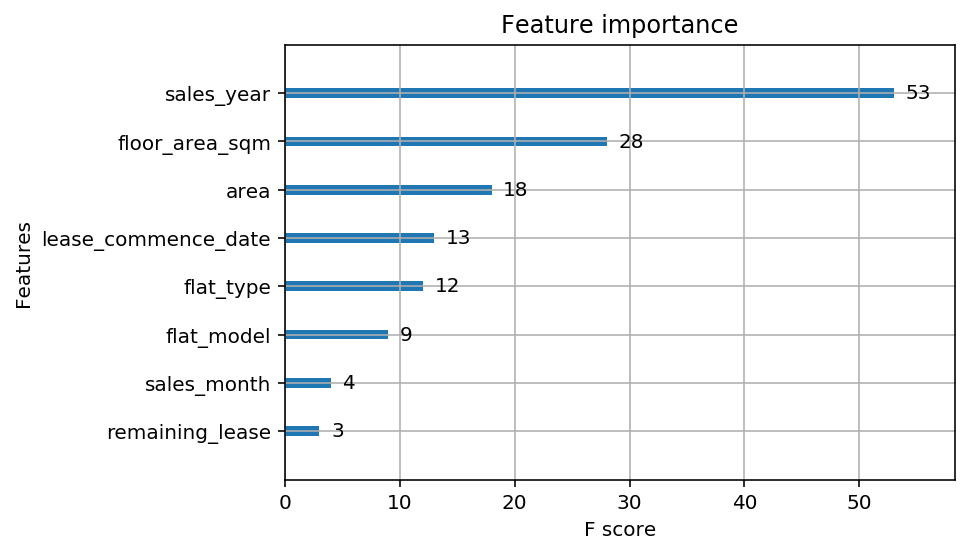

XGB Time = 1

### floor_area_sqm removed ###
MAE for Linear Regression is: 56705
LR Time = 0
MAE for Random Forrest is: 24473
RF Time = 2

Mean Absolute Error for AdaBoost is: 68938
Ada Time = 3

Mean Absolute Error for GradientBoostingRegressor is: 28033
GBR Time = 4

Mean Absolute Error for XGBoost is: 30811


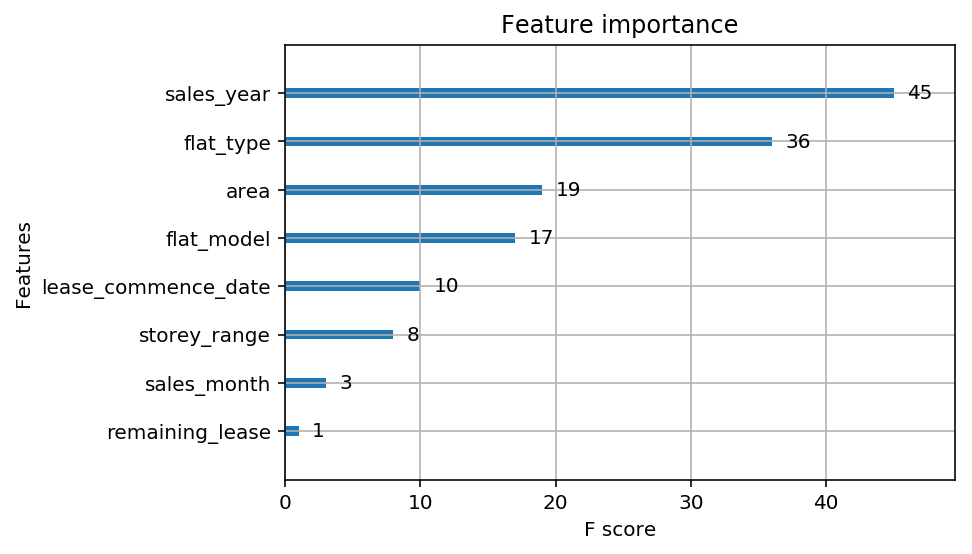

XGB Time = 1

### flat_model removed ###
MAE for Linear Regression is: 54734
LR Time = 0
MAE for Random Forrest is: 23323
RF Time = 2

Mean Absolute Error for AdaBoost is: 64205
Ada Time = 3

Mean Absolute Error for GradientBoostingRegressor is: 27276
GBR Time = 3

Mean Absolute Error for XGBoost is: 29931


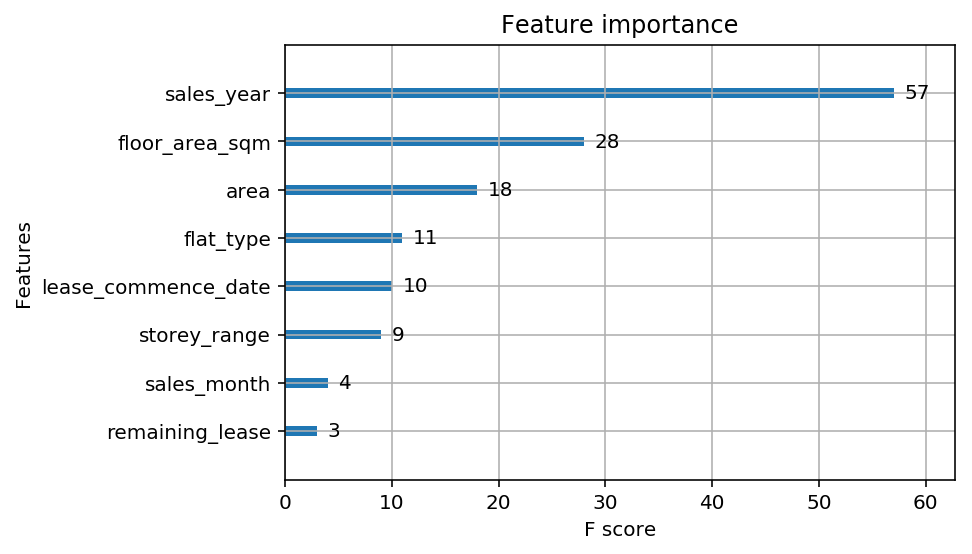

XGB Time = 1

### lease_commence_date removed ###
MAE for Linear Regression is: 54687
LR Time = 0
MAE for Random Forrest is: 23427
RF Time = 1

Mean Absolute Error for AdaBoost is: 63866
Ada Time = 3

Mean Absolute Error for GradientBoostingRegressor is: 27569
GBR Time = 3

Mean Absolute Error for XGBoost is: 30373


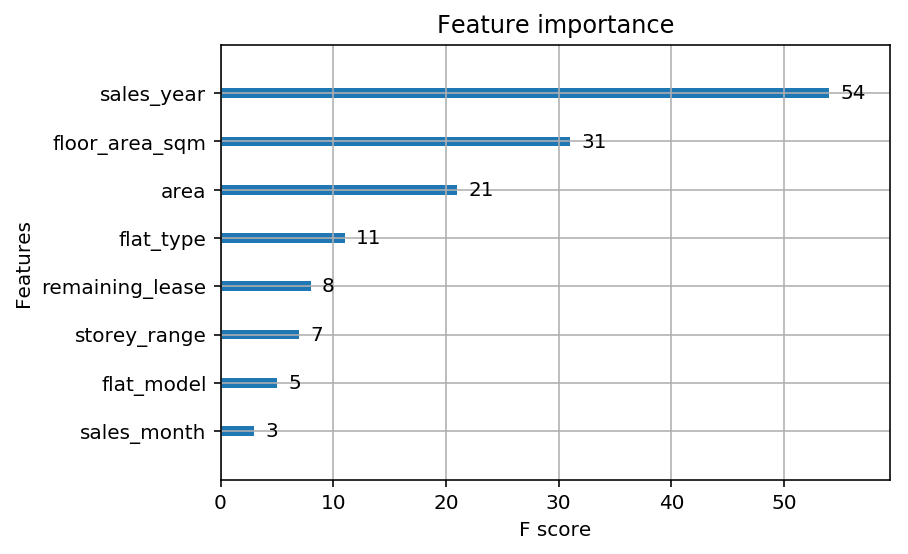

XGB Time = 1

### remaining_lease removed ###
MAE for Linear Regression is: 54687
LR Time = 0
MAE for Random Forrest is: 23065
RF Time = 2

Mean Absolute Error for AdaBoost is: 65019
Ada Time = 4

Mean Absolute Error for GradientBoostingRegressor is: 27548
GBR Time = 4

Mean Absolute Error for XGBoost is: 30189


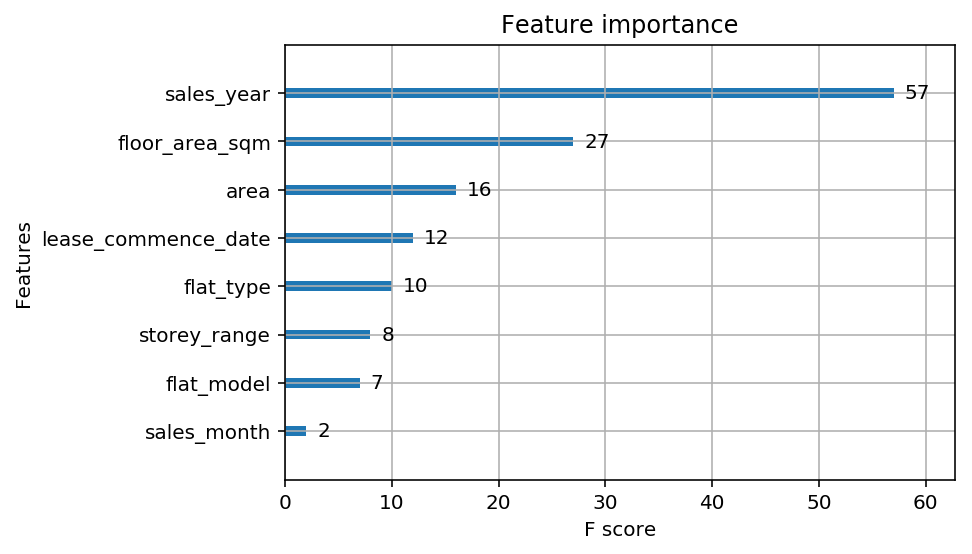

XGB Time = 1


In [145]:
# columns selection
eng_columns = np.array(list(data_sample.drop(columns=['resale_price','town','street_name','block'],axis=1)))

for i in range(0,len(eng_columns)):
    inpt = eng_columns[i]
    data_single_f = data_sample.drop(inpt,axis=1)
    print('\n###',inpt,'removed ###')
    lin_reg(data_single_f)
    random_f(data_single_f)
    ada(data_single_f)
    gbr(data_single_f)
    xgb_boost(data_single_f)



There was no improvement for leaving aside any single feature.

### 4.4 Testing features individually


### sales_month ###
MAE for Linear Regression is: 113084
LR Time = 0
MAE for Random Forrest is: 112934
RF Time = 0

Mean Absolute Error for AdaBoost is: 118953
Ada Time = 0

Mean Absolute Error for GradientBoostingRegressor is: 112934
GBR Time = 1

Mean Absolute Error for XGBoost is: 112914


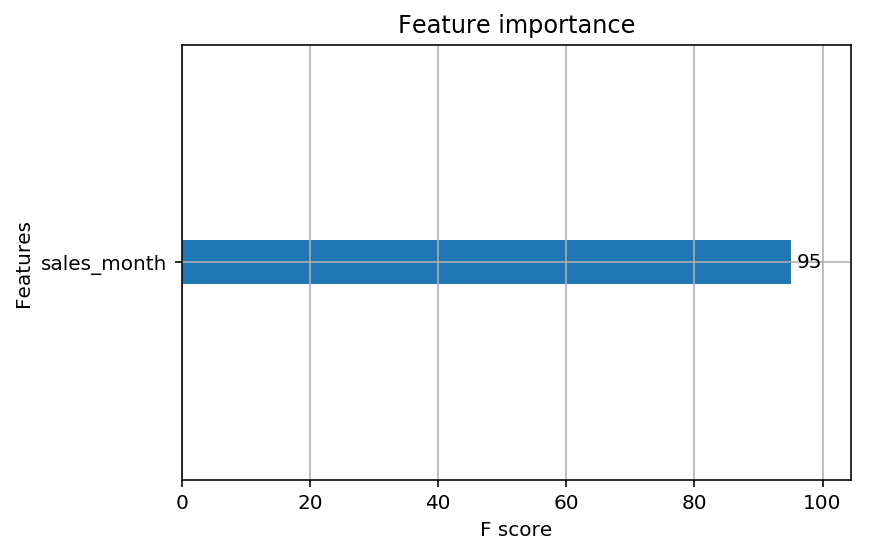

XGB Time = 0

### area ###
MAE for Linear Regression is: 113071
LR Time = 0
MAE for Random Forrest is: 112893
RF Time = 0

Mean Absolute Error for AdaBoost is: 118393
Ada Time = 0

Mean Absolute Error for GradientBoostingRegressor is: 112912
GBR Time = 1

Mean Absolute Error for XGBoost is: 112891


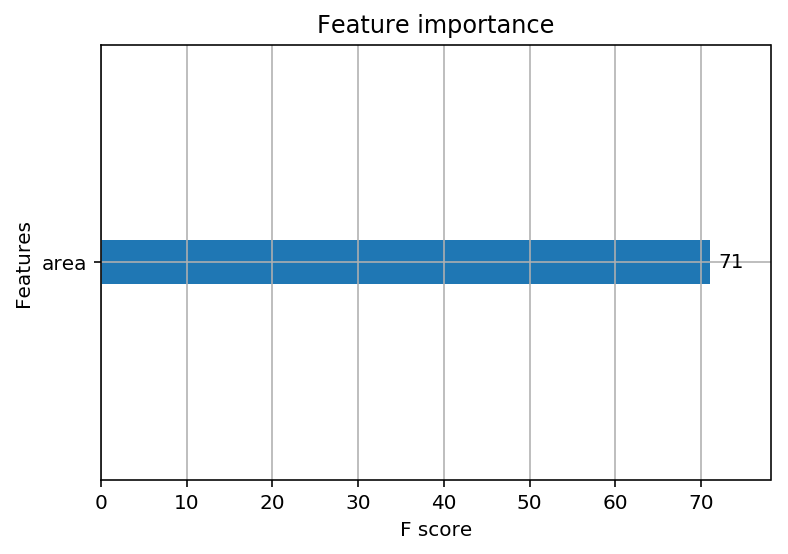

XGB Time = 0

### sales_year ###
MAE for Linear Regression is: 90457
LR Time = 0
MAE for Random Forrest is: 81369
RF Time = 0

Mean Absolute Error for AdaBoost is: 90301
Ada Time = 0

Mean Absolute Error for GradientBoostingRegressor is: 81351
GBR Time = 1

Mean Absolute Error for XGBoost is: 81330


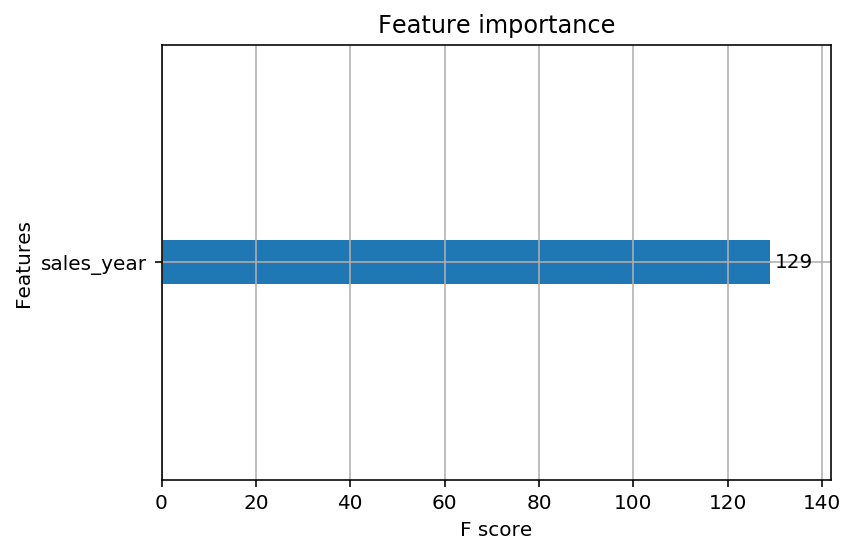

XGB Time = 1

### flat_type ###
MAE for Linear Regression is: 82607
LR Time = 0
MAE for Random Forrest is: 80849
RF Time = 0

Mean Absolute Error for AdaBoost is: 89164
Ada Time = 0

Mean Absolute Error for GradientBoostingRegressor is: 80876
GBR Time = 1

Mean Absolute Error for XGBoost is: 80841


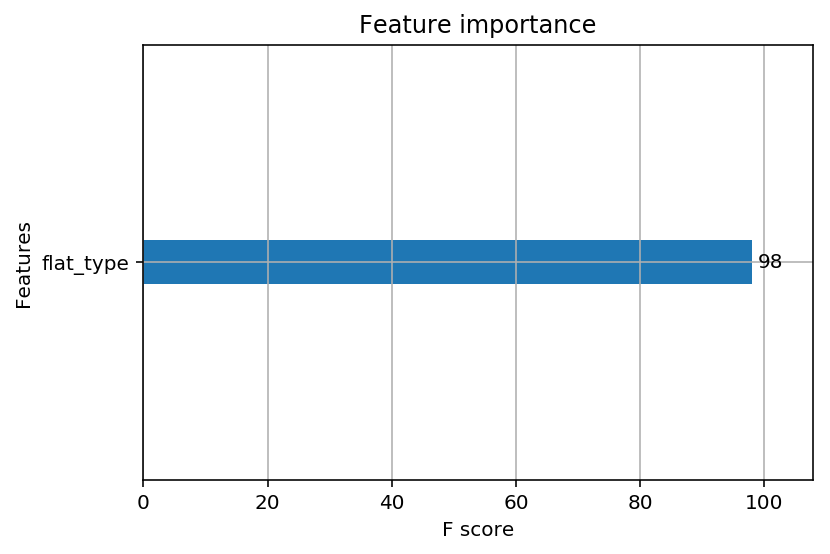

XGB Time = 0

### storey_range ###
MAE for Linear Regression is: 111594
LR Time = 0
MAE for Random Forrest is: 109119
RF Time = 0

Mean Absolute Error for AdaBoost is: 114079
Ada Time = 0

Mean Absolute Error for GradientBoostingRegressor is: 109134
GBR Time = 1

Mean Absolute Error for XGBoost is: 109151


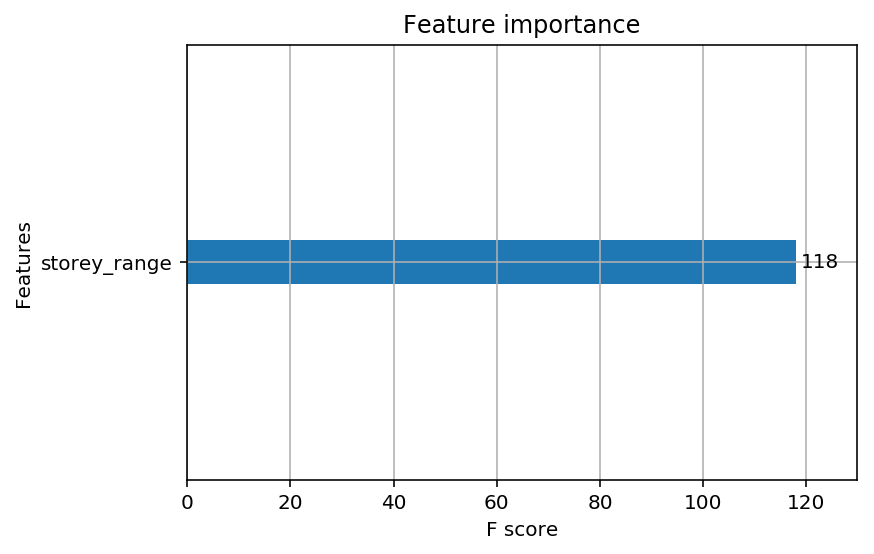

XGB Time = 0

### floor_area_sqm ###
MAE for Linear Regression is: 82784
LR Time = 0
MAE for Random Forrest is: 79792
RF Time = 0

Mean Absolute Error for AdaBoost is: 87791
Ada Time = 0

Mean Absolute Error for GradientBoostingRegressor is: 79916
GBR Time = 1

Mean Absolute Error for XGBoost is: 79955


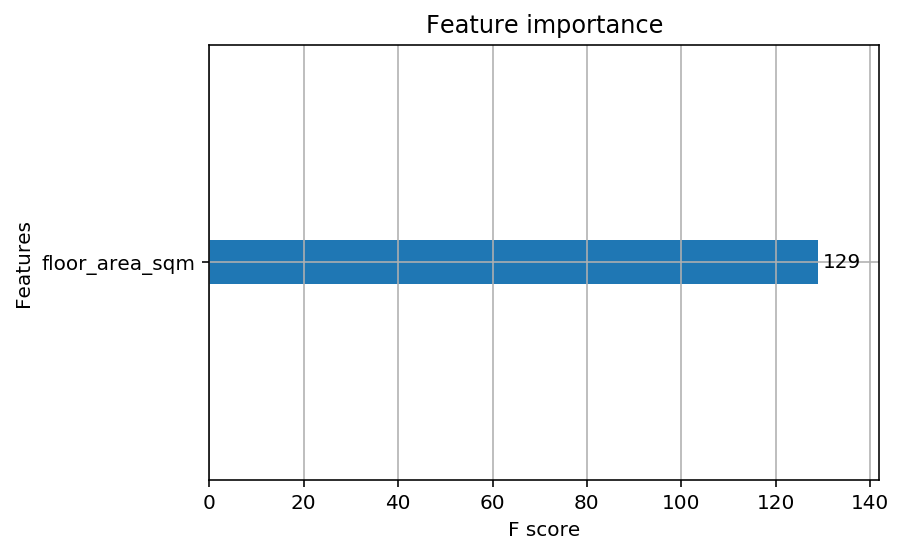

XGB Time = 0

### flat_model ###
MAE for Linear Regression is: 105966
LR Time = 0
MAE for Random Forrest is: 95200
RF Time = 0

Mean Absolute Error for AdaBoost is: 103209
Ada Time = 0

Mean Absolute Error for GradientBoostingRegressor is: 95246
GBR Time = 1

Mean Absolute Error for XGBoost is: 95313


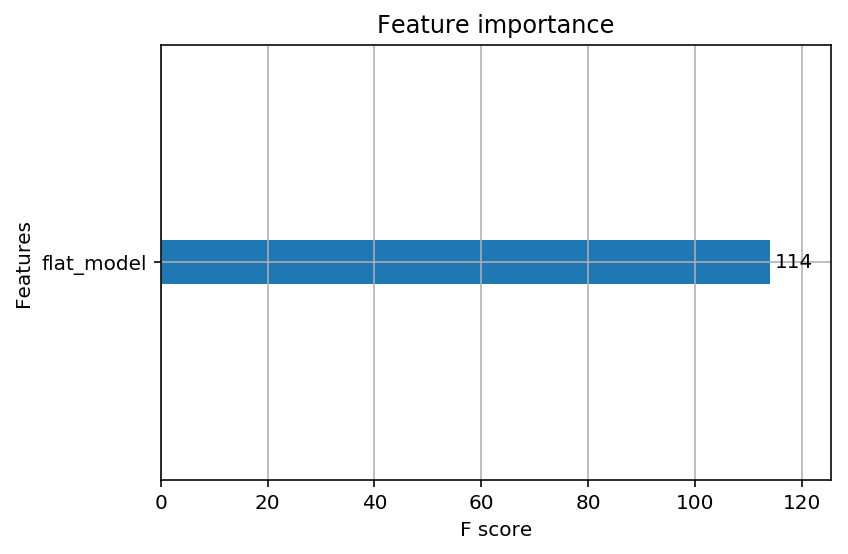

XGB Time = 0

### lease_commence_date ###
MAE for Linear Regression is: 97722
LR Time = 0
MAE for Random Forrest is: 95169
RF Time = 0

Mean Absolute Error for AdaBoost is: 104035
Ada Time = 0

Mean Absolute Error for GradientBoostingRegressor is: 95204
GBR Time = 1

Mean Absolute Error for XGBoost is: 95241


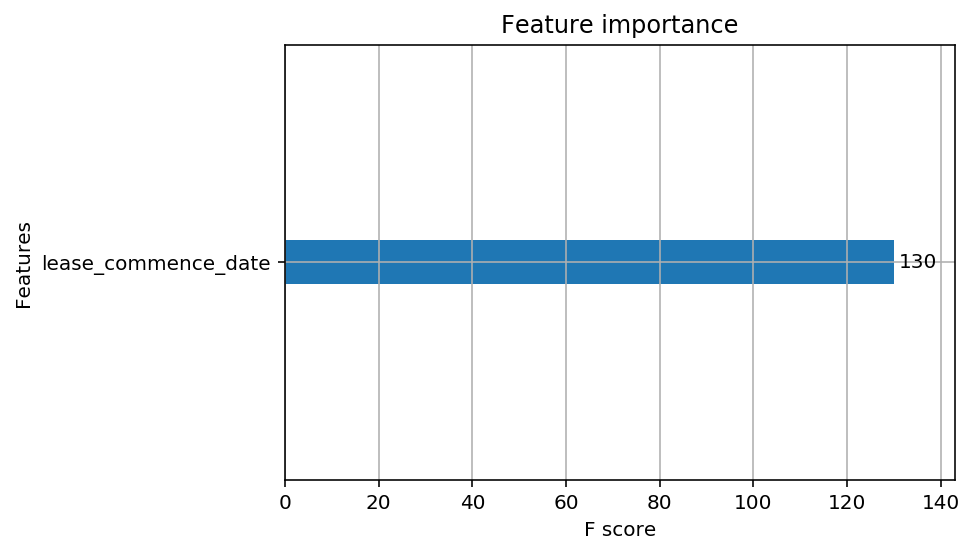

XGB Time = 0

### remaining_lease ###
MAE for Linear Regression is: 113110
LR Time = 0
MAE for Random Forrest is: 110030
RF Time = 0

Mean Absolute Error for AdaBoost is: 117913
Ada Time = 0

Mean Absolute Error for GradientBoostingRegressor is: 109994
GBR Time = 1

Mean Absolute Error for XGBoost is: 109967


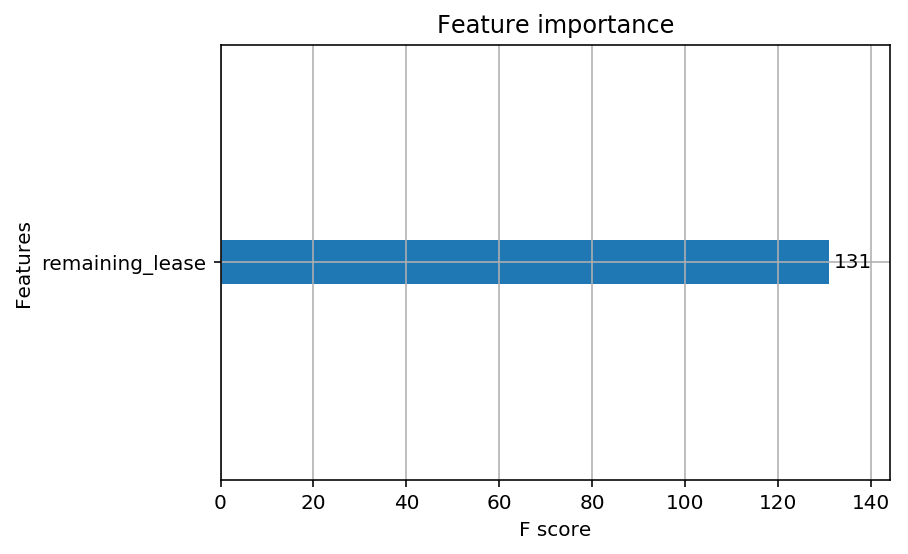

XGB Time = 1


In [155]:
# columns selectione
eng_columns = np.array(list(data_sample.drop(columns=['resale_price','town','street_name','block'],axis=1)))

for i in range(0,len(eng_columns)):
    inpt = eng_columns[i]
    data_inv = data_sample[[inpt,'resale_price']]
    print('\n###',inpt,'###')
    lin_reg(data_inv)
    random_f(data_inv)
    ada(data_inv)
    gbr(data_inv)
    xgb_boost(data_inv)
    

### 4.5 Only taking the best performers

MAE for Linear Regression is: 56293
LR Time = 0
MAE for Random Forrest is: 32579
RF Time = 1

Mean Absolute Error for AdaBoost is: 68371
Ada Time = 2

Mean Absolute Error for GradientBoostingRegressor is: 34753
GBR Time = 2

Mean Absolute Error for XGBoost is: 36508


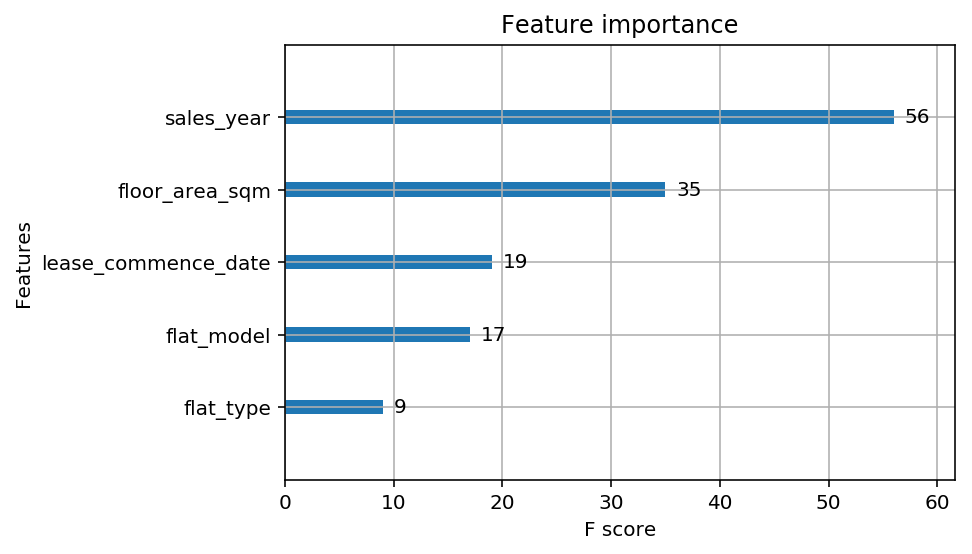

XGB Time = 1


In [158]:
data_best = data_sample.copy()
data_best = data_best[['sales_year','flat_type','floor_area_sqm','resale_price','lease_commence_date','flat_model']]
lin_reg(data_best)
random_f(data_best)
ada(data_best)
gbr(data_best)
xgb_boost(data_best)


It seems like our prediction truly is the best for all features included.